In [1]:
import numpy as np
from numpy.random import rand, randn, randint
import random
import matplotlib.pyplot as plt
from numpy import sqrt

## Example BPSK in AWGN

SNR = 0 dB, BLER = 0.485390
SNR = 1 dB, BLER = 0.369820
SNR = 2 dB, BLER = 0.262270
SNR = 3 dB, BLER = 0.169120
SNR = 4 dB, BLER = 0.096060
SNR = 5 dB, BLER = 0.046140
SNR = 6 dB, BLER = 0.018860
SNR = 7 dB, BLER = 0.006640
SNR = 8 dB, BLER = 0.001480
SNR = 9 dB, BLER = 0.000280
SNR = 10 dB, BLER = 0.000010


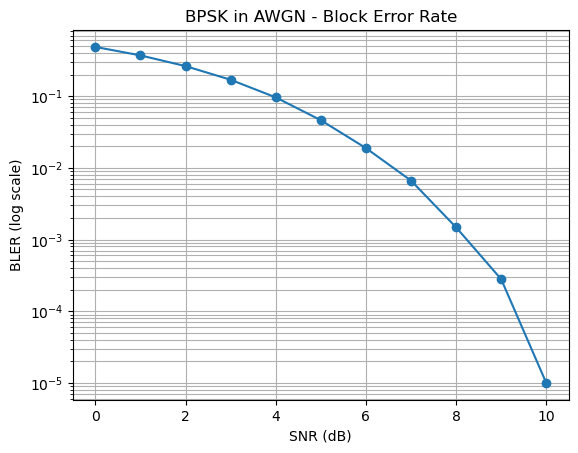

In [6]:

def bpsk_modulation(bits):
    """
    BPSK 調變: 將 0 -> -1, 1 -> +1
    """
    return 2.0 * bits - 1.0  # bits=0 -> -1, bits=1 -> +1

def bpsk_demodulation(received_symbols):
    """
    BPSK 解調: 大於 0 判斷為 1, 小於等於 0 判斷為 0
    """
    detected_bits = np.where(received_symbols > 0, 1, 0)
    return detected_bits

def simulate_bler(num_blocks, block_size, snr_db=0):
    """
    在 AWGN 通道下，使用 BPSK 的 BLER 模擬。
    num_blocks:     需要傳輸的區塊總數
    block_size:     每個區塊的 bit 數量
    snr_db:         以 dB 表示的 SNR
    """
    # 將 SNR (dB) 轉成 線性倍率
    snr_linear = 10 ** (snr_db / 10.0)
    
    # 假設 BPSK 符號能量為 1，則每個 bit 的功率為 1
    # AWGN 噪聲方差 = 1 / (2*SNR)
    noise_variance = 1 / (2 * snr_linear)
    
    error_blocks = 0  # 累計錯誤區塊數
    total_blocks = num_blocks
    
    for _ in range(num_blocks):
        # 1. 產生隨機位元
        bits = np.random.randint(0, 2, block_size)      ## 0和1組成的block
        
        # 2. BPSK 調變
        symbols = bpsk_modulation(bits)
        
        # 3. AWGN 通道: 加入高斯白雜訊
        noise = np.sqrt(noise_variance) * np.random.randn(block_size)
        received = symbols + noise
        
        # 4. 接收解調
        detected_bits = bpsk_demodulation(received)
        
        # 5. 判斷整個區塊是否有任何 bit 錯誤
        #    若有任一 bit 出錯，即計為錯誤區塊
        if np.any(detected_bits != bits):
            error_blocks += 1
    
    # 6. 計算 BLER
    bler = error_blocks / total_blocks
    return bler

# 主程式執行
if __name__ == "__main__":

    snr_db_list = []                # SNR dB
    for i in range(11):
         snr_db_list.append(i)
    
    num_blocks = 100000             # 總區塊數
    block_size = 8                # 每個區塊的 bit 數量

    bler_results = []

    for snr_db in snr_db_list:
        bler = simulate_bler(num_blocks=num_blocks, 
                             block_size=block_size, 
                             snr_db=snr_db)
        bler_results.append(bler)
        print(f"SNR = {snr_db} dB, BLER = {bler:.6f}")

    # 畫圖 (可選)
    plt.figure()
    plt.semilogy(snr_db_list, bler_results, marker='o')
    plt.xlabel("SNR (dB)")
    plt.ylabel("BLER (log scale)")
    plt.title("BPSK in AWGN - Block Error Rate")
    plt.grid(True, which='both')
    plt.show()


In [4]:
import numpy as np
from numpy.random import rand, randn, randint
import random
import matplotlib.pyplot as plt
from numpy import sqrt

## Single AWE ANcode Decoder(A=13,53)

In [5]:
def ANdecoder_13(residue,quotient):
    s_re=str(residue)
    msg={
        "1": lambda quotient: quotient ,
        "2": lambda quotient: quotient ,
        "4": lambda quotient: quotient ,
        "8": lambda quotient: quotient ,
        "3": lambda quotient: quotient-1 ,
        "6": lambda quotient: quotient -2,

        "12" :lambda quotient: quotient+1,
        "11" :lambda quotient: quotient+1,
        "9" :lambda quotient: quotient+1,
        "5" :lambda quotient: quotient+1,
        "10" :lambda quotient: quotient+2,
        "7" :lambda quotient: quotient+3,
        "0" :lambda quotient: quotient,
    }[s_re](quotient)
    msg

    if(msg<0):
        msg=0
    
    return int(msg)
#take 13 for example 
#barrett reduction
'''DR=2**6
n = 1+ int(np.log2(DR))
m=13
w = int((1/m) * (2**n)) # left shift
'''
def Barret_q_13(x):
    # 設定新的乘數和右移位元數
    q = (x * 315) >> 12  # 改為右移 12 位
    r = x - q * 13
    if r < 13:
        return (r, q)
    else:
        return (r - 13, q + 1)


In [99]:
def AN_decoder53(residue,quotient):
    s_re=str(residue)
    msg={
        "1": lambda quotient: quotient,
        "2": lambda quotient: quotient,
        "4": lambda quotient: quotient,
        "8": lambda quotient: quotient,
        "16": lambda quotient: quotient,
        "32": lambda quotient: quotient,
        "11": lambda quotient: quotient-1,
        "22": lambda quotient: quotient-2,
        "44": lambda quotient: quotient-4,
        "35": lambda quotient: quotient-9,
        "17": lambda quotient: quotient-19,
        "34": lambda quotient: quotient-38,
        "15": lambda quotient: quotient-77,
        "30": lambda quotient: quotient-154,
        "7": lambda quotient: quotient-309,
        "14": lambda quotient: quotient-618,
        "28": lambda quotient: quotient-1236,
        "3": lambda quotient: quotient-2473,
        "6": lambda quotient: quotient-4946,
        "12": lambda quotient: quotient-9892,
        "24": lambda quotient: quotient-19784,
        "48": lambda quotient: quotient-39568,
        "43": lambda quotient: quotient-79137,
        "33": lambda quotient: quotient-158275,
        "13": lambda quotient: quotient-316551,
        "26": lambda quotient: quotient-633102,
        "52": lambda quotient: quotient+1,
        "51": lambda quotient: quotient+1,
        "49": lambda quotient: quotient+1,
        "45": lambda quotient: quotient+1,
        "37": lambda quotient: quotient+1,
        "21": lambda quotient: quotient+1,
        "42": lambda quotient: quotient+2,
        "31": lambda quotient: quotient+3,
        "9": lambda quotient: quotient+5,
        "18": lambda quotient: quotient+10,
        "36": lambda quotient: quotient+20,
        "19": lambda quotient: quotient+39,
        "38": lambda quotient: quotient+78,
        "23": lambda quotient: quotient+155,
        "46": lambda quotient: quotient+310,
        "39": lambda quotient: quotient+619,
        "25": lambda quotient: quotient+1237,
        "50": lambda quotient: quotient+2474,
        "47": lambda quotient: quotient+4947,
        "41": lambda quotient: quotient+9893,
        "29": lambda quotient: quotient+19785,
        "5": lambda quotient: quotient+39569,
        "10": lambda quotient: quotient+79138,
        "20": lambda quotient: quotient+158276,
        "40": lambda quotient: quotient+316552,
        "27": lambda quotient: quotient+633103,
        "0" :lambda quotient: quotient,
    }[s_re](quotient)
    msg
    return int(msg)

def Barret_q_53(x):
    q = (x * 618) >> 15
    r = x - q * 53
    if r < 53:
        return (r,q)
    else:
        return (r-53,q+1)

In [100]:
# 傳遞資料為0~255的無號數整數
message=[]
message_count=1000000
for i in range(message_count):
    message.append(random.randint(0,255))

## A=53乘積編碼
codeword53=[]
for element in message:
    codeword53.append(element*53)
    
print(codeword53)
    
#turn *53 into binary
codeword53_bin=[]
for ele in codeword53:
    s='{0:014b}'.format(ele)
    codeword53_bin.append(s)
#codeword53_bin

#can be replaced by np.reshape
bit53_part=[]
for c_bin in codeword53_bin:
    for single_bit in c_bin:
            bit53_part.append(int(single_bit))
            
#transmition bit
tran53=[]
for b in bit53_part:
    if b==1:
        tran53.append(sqrt(1))
    else:
        tran53.append(-sqrt(1))
        

[10017, 2226, 5618, 4399, 2597, 3763, 7738, 13250, 318, 5459, 3392, 318, 5459, 2173, 8639, 7685, 9169, 4505, 2491, 6254, 7632, 1166, 8798, 3657, 12455, 2173, 5512, 7102, 1431, 4929, 13091, 6360, 13038, 1855, 10282, 7102, 8798, 5088, 689, 5777, 7208, 7420, 4611, 4240, 9593, 7632, 3233, 3074, 10494, 2438, 4505, 318, 6254, 3869, 12614, 1378, 2650, 10282, 8003, 1272, 6413, 4664, 3127, 3922, 1431, 742, 9752, 5459, 8798, 2491, 10653, 11766, 1537, 2968, 5936, 12561, 12031, 12879, 9063, 8745, 4664, 1060, 11236, 13303, 11077, 530, 5035, 12349, 8586, 6996, 1007, 6625, 1166, 742, 1961, 12190, 2491, 3710, 6519, 11395, 9699, 13250, 4134, 9858, 5035, 10388, 6042, 2915, 7473, 11766, 1219, 3286, 8162, 10865, 1378, 1643, 12720, 3657, 8321, 424, 6731, 1007, 9275, 4399, 11289, 1060, 9381, 5459, 8480, 9593, 3392, 2385, 7738, 3286, 9805, 11024, 5141, 13409, 12243, 11501, 9169, 10335, 5035, 3074, 9964, 4611, 5618, 3869, 7208, 11130, 10070, 6837, 212, 8904, 8639, 8003, 9593, 4346, 10388, 901, 12296, 4293, 10

In [101]:
N = message_count*14
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
bler=[None]*itr

two_d_array_bler53=[None]*itr
q_ber53=[None]*itr

19


In [102]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    uncode_bit = 2 * (rand(N) >= 0.5) - 1
    x53=tran53  
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    ## 雜訊強度增加2倍
    noise_std *= 2
    uncode_bit_noise=uncode_bit + noise_std * randn(N)

    y53 = x53 + noise_std * randn(N)
    #BPSK decode
    ###### AN code receive decode for A=13 ##########
    y53_d = 2 * (y53 >= 0) - 1    
    receive53=[]
    for receive_bit in y53_d:
        if(receive_bit==1):
            receive53.append(1)
        else:
            receive53.append(0)
    ################################################
    

    ########### uncode_receive decode##############
    uncode_bit_receive = 2 * (uncode_bit_noise >= 0) - 1
    uncode_receive_decode=[]
    for receive_bit in uncode_bit_receive:
        if(receive_bit==1):
            uncode_receive_decode.append(1)
        else:
            uncode_receive_decode.append(-1)
    ############################################
    

    #reshape
    temp53 = np.reshape(receive53, (message_count, 14))
    #bit to decimal
    receive53_decimal = []
    

    for ele in temp53:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(13-ind)*val+int_out
        receive53_decimal.append(int_out)

    # 2d array 
    decode53_num_msg=[]
    decode53_num_codeword=[]
    q53_check_list=[]
    #10x10x2 array
    for i in range(10000):
        receive53_decimal_100=[]
        receive53_decimal_100=receive53_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r53_list=[]
        q53_list=[]

        for ele in receive53_decimal_100:
            r,q=Barret_q_53(ele)
            r53_list.append(r)
            q53_list.append(q)

            q53_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r53_list[i],q53_list[i]]  

        error53_row=[]
        error53_col=[]
        for i in range(10):
            s_r53=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c53=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error53_row.append(s_r53)
            error53_col.append(s_c53)
        #turn into true false
        for ind,val in enumerate(error53_row):
            if(val!=0):
                error53_row[ind]=True
            else:
                error53_row[ind]=False

        for ind,val in enumerate(error53_col):
            if(val!=0):
                error53_col[ind]=True
            else:
                error53_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table53_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table53_for_row_col[i,j]=error53_row[i] and error53_col[j]

        true_false_table53_for_row_col=true_false_table53_for_row_col.reshape(100,1)
        error_index_from_TF53_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table53_for_row_col):
            if(ele):
                error_index_from_TF53_table=ind
                break

        if(error_index_from_TF53_table==-1):
            decode53_msg100=q53_list
            decode53_num_msg.extend(decode53_msg100)
            #print(len(decode53_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive53_decimal_100[error_index_from_TF53_table]
            r,q=Barret_q_53(error_codeword)
            corrected_value=AN_decoder53(r,q)
            q53_list[ind]=corrected_value
            decode53_msg100=q53_list
            decode53_num_msg.extend(decode53_msg100)
            #print(len(decode13_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER53_ERROR=0
    for c in range(len(decode53_num_msg)):
        if(decode53_num_msg[c] !=message[c]):
            BLER53_ERROR=BLER53_ERROR+1  
    two_d_array_bler53[n] =1.0 * BLER53_ERROR / message_count
    ########################################
    #uncode BER
    uncode_error =(uncode_bit !=uncode_receive_decode).sum()
    uncode_ber[n]=1.*uncode_error/N
    
    q53_num=0
    for i in range(len(decode53_num_msg)):
        if(message[i]!=q53_check_list[i]):
            q53_num=q53_num+1

    q_ber53[n]=1.*q53_num/len(decode53_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded Error probability", uncode_ber[n])
    print ("Error probability without decoder:", q_ber53[n] )
    print ("Error probability with decoder A=53:", two_d_array_bler53[n] )

    

EbNodB: 0
Uncoded Error probability 0.23964557142857143
Error probability without decoder: 0.929708
Error probability with decoder A=53: 0.929089
EbNodB: 1
Uncoded Error probability 0.21387042857142857
Error probability without decoder: 0.905373
Error probability with decoder A=53: 0.904428
EbNodB: 2
Uncoded Error probability 0.1864917857142857
Error probability without decoder: 0.872993
Error probability with decoder A=53: 0.871783
EbNodB: 3
Uncoded Error probability 0.15880514285714287
Error probability without decoder: 0.826641
Error probability with decoder A=53: 0.824943
EbNodB: 4
Uncoded Error probability 0.13121321428571428
Error probability without decoder: 0.764699
Error probability with decoder A=53: 0.762549
EbNodB: 5
Uncoded Error probability 0.10415821428571428
Error probability without decoder: 0.683093
Error probability with decoder A=53: 0.680378
EbNodB: 6
Uncoded Error probability 0.07921457142857143
Error probability without decoder: 0.582553
Error probability with de

In [103]:
print(two_d_array_bler53)

[0.929089, 0.904428, 0.871783, 0.824943, 0.762549, 0.680378, 0.579591, 0.46175, 0.338572, 0.222654, 0.127886, 0.062333, 0.023064, 0.004511, 0.000362, 1.5e-05, 0.0, 0.0, 0.0]


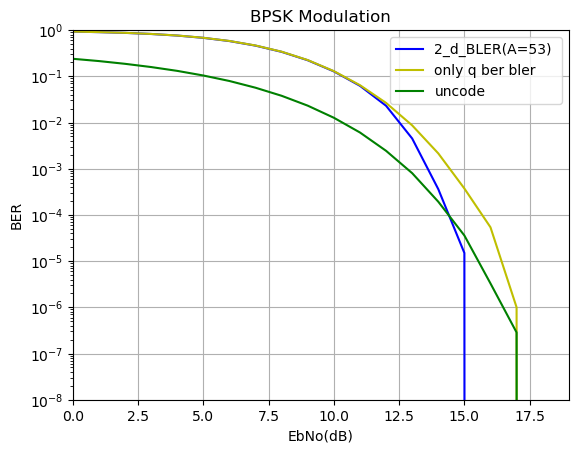

In [104]:
#two_d_BLER13=plt.plot( EbNodB_range, two_d_array_bler13, 'r',label="2_d_BLER(A=13) ")
two_d_BLER53=plt.plot( EbNodB_range, two_d_array_bler53, 'b',label="2_d_BLER(A=53) ")
only_q53=plt.plot( EbNodB_range, q_ber53, 'y',label="only q ber bler")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="uncode")

#hamming_ber_line=plt.plot(EbNodB_range, hamming_ber, 'y',label="(7,4)hamming_ber")
plt.legend()
#plt.plot(EbNodB_range, an_decode_ber, 'b')
plt.axis([0, itr, 1e-8, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.savefig("BPSK")
plt.show()

### 使用查找表更正
* Function Definition

In [86]:
import math
import numpy as np

def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


def create_mapping(source_list, address_map):
    """
    建立值到位址和位址到值的雙向映射。
    若 address_map 中某位址沒有對應值，則該位址的值為 0。
    
    參數:
    source_list (list): 原始資料列表。
    address_map (list): 位址映射列表。
    
    回傳:
    tuple: (值到位址的映射, 位址到值的映射)
    """
    # 初始化值到位址的映射
    value_to_address = {value: addr for value, addr in zip(source_list, address_map)}
    
    # 初始化位址到值的映射，未指定的位址預設為 0
    max_address = max(address_map)  # 確保涵蓋所有位址
    address_to_value = {addr: 0 for addr in range(max_address + 1)}  # 預設為 0
    for value, addr in zip(source_list, address_map):
        address_to_value[addr] = value  # 更新有指定值的位址

    return value_to_address, address_to_value
def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


In [87]:
### 輸入數值為data, ANcode的A為AN
### 乘完A後的數值為 input
data = 255
AN = 1939     ## AN:1939 只適用輸入為0~255
input = data*AN
bits = bits_needed(input)

### 1-bit AWE:
AWE_1=[]
e1=0     ## 錯誤數量
e1_data=[]
for i in range(0, bits):
    AWE_1.insert(e1 , input + 2**i)
    e1_data.insert(e1, 2**i)
    e1 = e1 + 1
    AWE_1.insert(e1 , input - 2**i)
    e1_data.insert(e1, -2**i)
    e1 = e1 + 1
    
### 2-bit AWE:
AWE_2=[]
e2=0     ## 錯誤數量
p=0      ## 錯誤位置
e2_data=[]
for i in range(0, bits):
    for j in range(i+1, bits):
        AWE_2.insert(e2 , (input + 2**i + 2**j))
        e2_data.insert(e2 , (2**i + 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input + 2**i - 2**j))
        e2_data.insert(e2 , (2**i - 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i + 2**j))
        e2_data.insert(e2 , (-2**i + 2**j))                
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i -2**j))
        e2_data.insert(e2 , (-2**i - 2**j))
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        p = p + 1
        
## 把list:AWE_1 和 list:AWE_2合併
AWE = AWE_1 + AWE_2
e_total = e1_data + e2_data
## 把重複的 AWE 去除
new_AWE = remove_duplicates(AWE)
new_e_total = remove_duplicates(e_total)
AWE_count = np.size(new_AWE)
e_count = np.size(new_e_total)

### 模AN, 使用一般mod函數和 Barret reduction 比較
remainder = []
for m in range(0,AWE_count):
    mod = custom_mod(new_AWE[m], AN)
    remainder.append(mod)

print("錯誤資料對AN取完模數:\n",remainder)

##############################################################
### Barret reduction ###
def Barret_q_1939(x):       
    q = (x * 540) >> 20        ## (2^20)//1939後, 右移20次 
    r = x - q * 1939
    if r < 1939:
        return (r,q)
    else:
        return (r-1939,q+1)
    
Barret_remainder = []
for m in range(0,AWE_count):
    Barret_r,Barret_q = Barret_q_1939(new_AWE[m])
    Barret_remainder.append(Barret_r)
    
print("Barret reduction對錯誤資料取完模數:\n",Barret_remainder)
print("Barret reduction是否可以使用:", Barret_remainder == remainder)
#################################################################
print("所有餘數是否完全相異:", remainder_unique(remainder))
print("所有的AWE:\n", new_e_total)
print(np.size(remainder))

### 建立錯誤映射表(LUT)
## Decoder
AWE_to_remainder, remainder_to_AWE = create_mapping(new_e_total, Barret_remainder)

## example
example_r1 = Barret_remainder[0]
example_r2 = Barret_remainder[1]
print(f"輸入餘數 {example_r1}, 對應算術錯誤: {remainder_to_AWE[example_r1]}")
print(f"輸入餘數 {example_r2}, 對應算術錯誤: {remainder_to_AWE[example_r2]}")

Raw_data1 = new_AWE[0]-remainder_to_AWE[example_r1]
Raw_data2 = new_AWE[1]-remainder_to_AWE[example_r2]
print(Raw_data1)
print(Raw_data2)
print("更正是否正確:", input == Raw_data1)

第 0 筆錯誤資料: 494448
第 0 筆算術錯誤: 3
第 1 筆錯誤資料: 494444
第 1 筆算術錯誤: -1
第 2 筆錯誤資料: 494446
第 2 筆算術錯誤: 1
第 3 筆錯誤資料: 494442
第 3 筆算術錯誤: -3
第 4 筆錯誤資料: 494450
第 4 筆算術錯誤: 5
第 5 筆錯誤資料: 494442
第 5 筆算術錯誤: -3
第 6 筆錯誤資料: 494448
第 6 筆算術錯誤: 3
第 7 筆錯誤資料: 494440
第 7 筆算術錯誤: -5
第 8 筆錯誤資料: 494454
第 8 筆算術錯誤: 9
第 9 筆錯誤資料: 494438
第 9 筆算術錯誤: -7
第 10 筆錯誤資料: 494452
第 10 筆算術錯誤: 7
第 11 筆錯誤資料: 494436
第 11 筆算術錯誤: -9
第 12 筆錯誤資料: 494462
第 12 筆算術錯誤: 17
第 13 筆錯誤資料: 494430
第 13 筆算術錯誤: -15
第 14 筆錯誤資料: 494460
第 14 筆算術錯誤: 15
第 15 筆錯誤資料: 494428
第 15 筆算術錯誤: -17
第 16 筆錯誤資料: 494478
第 16 筆算術錯誤: 33
第 17 筆錯誤資料: 494414
第 17 筆算術錯誤: -31
第 18 筆錯誤資料: 494476
第 18 筆算術錯誤: 31
第 19 筆錯誤資料: 494412
第 19 筆算術錯誤: -33
第 20 筆錯誤資料: 494510
第 20 筆算術錯誤: 65
第 21 筆錯誤資料: 494382
第 21 筆算術錯誤: -63
第 22 筆錯誤資料: 494508
第 22 筆算術錯誤: 63
第 23 筆錯誤資料: 494380
第 23 筆算術錯誤: -65
第 24 筆錯誤資料: 494574
第 24 筆算術錯誤: 129
第 25 筆錯誤資料: 494318
第 25 筆算術錯誤: -127
第 26 筆錯誤資料: 494572
第 26 筆算術錯誤: 127
第 27 筆錯誤資料: 494316
第 27 筆算術錯誤: -129
第 28 筆錯誤資料: 494702
第 28 筆算術錯誤: 257
第 29 筆錯誤資料: 494190
第 29 筆算術

## 使用查找表更正2-bits Error 的BLER

In [88]:
# 傳遞資料為0~255的無號數整數
message=[]
message_count=1000000
for i in range(message_count):
    message.append(random.randint(0,255))

## DEC_AN=1939乘積編碼
codeword1939=[]
for element in message:
    codeword1939.append(element*1939)
        
#turn *1939 into binary
codeword1939_bin=[]
for ele in codeword1939:
    s='{0:019b}'.format(ele)
    codeword1939_bin.append(s)
#codeword1939_bin

#can be replaced by np.reshape
bit1939_part=[]
for c_bin in codeword1939_bin:
    for single_bit in c_bin:
            bit1939_part.append(int(single_bit))
#transmition bit
tran1939=[]
for b in bit1939_part:
    if b==1:
        tran1939.append(sqrt(1))
    else:
        tran1939.append(-sqrt(1))


In [89]:
N = message_count*19
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
bler=[None]*itr

two_d_array_bler1939=[None]*itr
q_ber1939=[None]*itr

19


In [90]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    uncode_bit = 2 * (rand(N) >= 0.5) - 1
    x1939=tran1939  
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    ## 雜訊強度增加2倍
    noise_std *= 2
    uncode_bit_noise=uncode_bit + noise_std * randn(N)

    y1939 = x1939 + noise_std * randn(N)
    #BPSK decode
    ###### AN code receive decode for A=1939 ##########
    y1939_d = 2 * (y1939 >= 0) - 1    
    receive1939=[]
    for receive_bit in y1939_d:
        if(receive_bit==1):
            receive1939.append(1)
        else:
            receive1939.append(0)
    ################################################
    

    ########### uncode_receive decode##############
    uncode_bit_receive = 2 * (uncode_bit_noise >= 0) - 1
    uncode_receive_decode=[]
    for receive_bit in uncode_bit_receive:
        if(receive_bit==1):
            uncode_receive_decode.append(1)
        else:
            uncode_receive_decode.append(-1)
    ############################################
    

    #reshape
    temp1939 = np.reshape(receive1939, (message_count, 19))
    
    #bit to decimal
    receive1939_decimal = []
    for ele in temp1939:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(18-ind)*val+int_out
        receive1939_decimal.append(int_out)

    # 2d array 
    decode1939_num_msg=[]
    decode1939_num_codeword=[]
    q1939_check_list=[]
    #100x100x2 array
    for i in range(10000):
        receive1939_decimal_100=[]
        receive1939_decimal_100=receive1939_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r1939_list=[]
        q1939_list=[]

        for ele in receive1939_decimal_100:
            r,q=Barret_q_1939(ele)
            r1939_list.append(r)
            q1939_list.append(q)

            q1939_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r1939_list[i],q1939_list[i]]  

        error1939_row=[]
        error1939_col=[]
        for i in range(10):
            s_r1939=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c1939=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error1939_row.append(s_r1939)
            error1939_col.append(s_c1939)
        #turn into true false
        for ind,val in enumerate(error1939_row):
            if(val!=0):
                error1939_row[ind]=True
            else:
                error1939_row[ind]=False

        for ind,val in enumerate(error1939_col):
            if(val!=0):
                error1939_col[ind]=True
            else:
                error1939_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table1939_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table1939_for_row_col[i,j]=error1939_row[i] and error1939_col[j]

        true_false_table1939_for_row_col=true_false_table1939_for_row_col.reshape(100,1)
        error_index_from_TF1939_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table1939_for_row_col):
            if(ele):
                error_index_from_TF1939_table=ind
                break

        if(error_index_from_TF1939_table==-1):
            decode1939_msg100=q1939_list
            decode1939_num_msg.extend(decode1939_msg100)
            #print(len(decode1939_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive1939_decimal_100[error_index_from_TF1939_table]
            r,q=Barret_q_1939(error_codeword)
            ### using LUT to recovery it 
            RAW_DATA = error_codeword - remainder_to_AWE[r]
            ### mod 1939 to get correct data
            corrected_r,corrected_q = Barret_q_1939(RAW_DATA)
            q1939_list[ind]=corrected_q
            decode1939_msg100=q1939_list
            decode1939_num_msg.extend(decode1939_msg100)
            #print(len(decode13_num_msg),"error")
    
    
   
    ## 2d BLER #########################
    BLER1939_ERROR=0
    for c in range(len(decode1939_num_msg)):
        if(decode1939_num_msg[c] !=message[c]):
            BLER1939_ERROR=BLER1939_ERROR+1  
    two_d_array_bler1939[n] =1.0 * BLER1939_ERROR / message_count
    ########################################
    ### uncode BER
    uncode_error =(uncode_bit !=uncode_receive_decode).sum()
    uncode_ber[n]=1.*uncode_error/N
    ########################################
    ### no decoder for AN
    q1939_num=0
    for i in range(len(decode1939_num_msg)):
        if(message[i]!=q1939_check_list[i]):
            q1939_num=q1939_num+1

    q_ber1939[n]=1.*q1939_num/len(decode1939_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded Error probability", uncode_ber[n])
    print ("Error probability without decoder:", q_ber1939[n] )
    print ("Error probability with decoder A=1939:", two_d_array_bler1939[n] )

    

EbNodB: 0
Uncoded Error probability 0.23965521052631578
Error probability without decoder: 0.935023
Error probability with decoder A=1939: 0.933765
EbNodB: 1
Uncoded Error probability 0.21368805263157895
Error probability without decoder: 0.915308
Error probability with decoder A=1939: 0.913555
EbNodB: 2
Uncoded Error probability 0.1866891052631579
Error probability without decoder: 0.888602
Error probability with decoder A=1939: 0.886217
EbNodB: 3
Uncoded Error probability 0.15886047368421052
Error probability without decoder: 0.850746
Error probability with decoder A=1939: 0.847588
EbNodB: 4
Uncoded Error probability 0.13111663157894737
Error probability without decoder: 0.798347
Error probability with decoder A=1939: 0.794407
EbNodB: 5
Uncoded Error probability 0.10427315789473685
Error probability without decoder: 0.726437
Error probability with decoder A=1939: 0.721957
EbNodB: 6
Uncoded Error probability 0.07919668421052632
Error probability without decoder: 0.634972
Error probabi

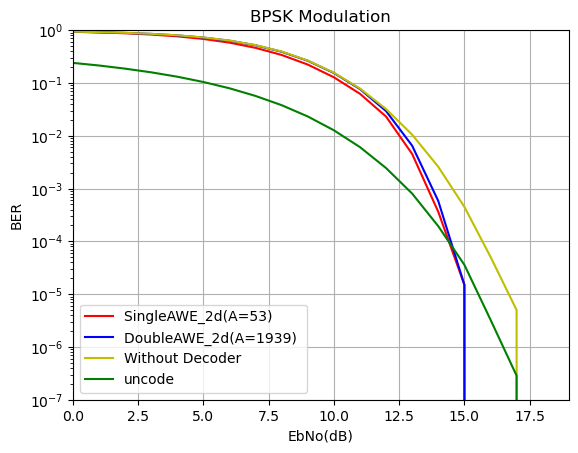

In [109]:
two_d_BLER53=plt.plot( EbNodB_range, two_d_array_bler53, 'r',label="SingleAWE_2d(A=53) ")
two_d_BLER1939=plt.plot( EbNodB_range, two_d_array_bler1939, 'b',label="DoubleAWE_2d(A=1939) ")
only_q1939=plt.plot( EbNodB_range, q_ber1939, 'y',label="Without Decoder")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="uncode")

plt.legend()
plt.axis([0, itr, 1e-7, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.savefig("BPSK with 1939")
plt.show()